# Compare to alternative models

In [1]:

from bayes_window.generative_models import generate_fake_spikes
from bayes_window.model_comparison import *
from bayes_window import BayesWindow

In [2]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=140,
                                                                n_neurons=10,
                                                                n_mice=8,
                                                                dur=7, 
                                                               mouse_response_slope=20,
                                                               overall_stim_response_strength=4)

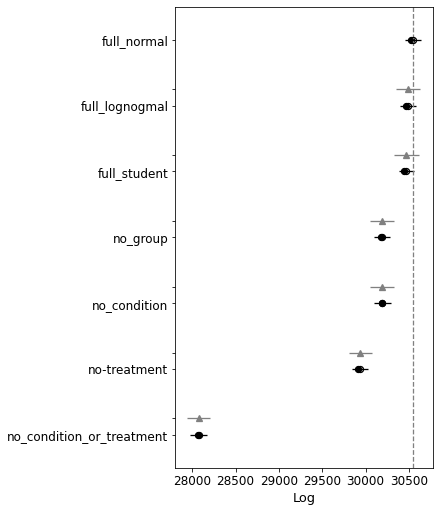

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
full_normal,0,30548.6,12.7175,0,NaN,96.1093,0,False,log
full_lognogmal,1,30486.7,12.7499,61.9559,NaN,91.0621,140.643,False,log
full_student,2,30471.5,13.1342,77.1162,NaN,89.7436,140.477,False,log
no_group,3,30192.6,7.11032,356.039,NaN,93.8096,136.4,False,log
no_condition,4,30191.1,3.68781,357.485,NaN,97.7011,137.74,False,log
no-treatment,5,29936.8,11.4054,611.827,NaN,93.1468,131.859,False,log
no_condition_or_treatment,6,28072.5,2.10538,2476.08,0,98.1497,133.422,False,log


In [4]:
window = BayesWindow(df, y='isi', treatment='stim', group='mouse', condition='neuron')
window.fit_slopes(model=models.model_hierarchical, do_mean_over_trials=True,)
window.explore_models()

Simple one-way ANOVA:

In [6]:
window.fit_anova()

isi~stim
             sum_sq    df          F    PR(>F)
stim      0.001945   1.0  54.907114  0.000003
Residual  0.000496  14.0        NaN       NaN


True

## Linear mixed effects model:

In [9]:
window.fit_lme()
window.posterior

Using formula isi ~ 1+ neuron | stim + (1 | mouse)


,mean interval,Std.Err.,z,p,higher interval,lower interval
Intercept,0.064,0.003,21.237,0.00,0.058,0.070
neuron | stim,-0.004,0.000,-113.107,0.00,-0.004,-0.004
1 | mouse,-0.002,0.001,-2.329,0.02,-0.003,-0.000
